## Project Title: 
## Operation Increase Sales and Profit (Data Analysis of a Four-Year Old Sales Data) 


### Project Objective

This project is aimed at using existing data to help a Multinational retail company to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** in order to increase sales of the company and maximise profit. 

### Table of Content

1. [Data Importation](#1.Data-Importation-and-Inspection)
2. [Data  Cleaning](#2.Cleaning-of-data)
3. [Feature Engineering](#3.Feature-Engineering)
4. [Data Analysis and Visualization](#4.Data-Analysis)
5. [Summary](#5.Summary)


In [3]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1.Data Importation and Inspection

In [4]:
#Reading the data
data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

#### 1.1 Data Inspection

In [5]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [67]:
data.tail(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [68]:
# A summary of the categorical columns only
data.describe(include = 'object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [69]:
# A summary of the numerical columns only
data.describe(include = np.number)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


Since Row ID and Postal ID are not numerical, hence their data type will be changed to reflect the change.

In [70]:
#checking for datatypes
data.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

The Postal Code and Row ID are not numerical data types hence we will change the type to object.

#### 1.2 Checking for missing variables 

In [71]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

We will investigate further to see what exactly is missing in the Postal Code column or drop it

In [72]:
duplicated_data_check = data.duplicated().sum()
print('The sum of duplicated numbers is:', duplicated_data_check)
print('====================================')



The sum of duplicated numbers is: 0


There are no duplicated rows or columns

## 2. Cleaning of data 

In [73]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [74]:
data['Row ID'].head()

0    42433
1    22253
2    48883
3    11731
4    22255
Name: Row ID, dtype: int64

In [75]:
data['Order ID'].head()

0       AG-2011-2040
1      IN-2011-47883
2       HU-2011-1220
3    IT-2011-3647632
4      IN-2011-47883
Name: Order ID, dtype: object

In [76]:
#Change Postal Code and Row ID type to object
data['Row ID']= data['Row ID'].astype(str)
data['Postal Code']= data['Postal Code'].astype(str)

In [77]:
data.dtypes

Row ID                    object
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code               object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

Row ID and Postal Code type changed

In [78]:
# A summary of the categorical columns only
data.describe(include = 'object')

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,51290,25035,4,1590,795,3,3636,1094,147,632,7,13,10292,3,17,3788,4
top,12495,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,nan,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,1,14,30775,97,108,26518,915,2001,9994,41296,11002,11117,35,31273,6152,227,29433


Row ID is now a categorical variable

In [64]:
#dropping Postal Code and Row ID Columns
data.drop('Postal Code',axis=1,inplace=True)
data.drop('Row ID',axis=1,inplace=True)

In [65]:
data.describe(include = np.number)

,Sales,Quantity,Discount,Profit,Shipping Cost,Unit Price,Order Interval
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
mean,246.490581,3.476545,0.142908,28.610982,26.375915,71.657487,5 days 01:53:49.120686
std,487.565361,2.278766,0.212280,174.340972,57.296804,113.581515,97 days 18:30:57.003928
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.336000,-322 days +00:00:00
25%,30.758625,2.000000,0.000000,0.000000,2.610000,11.799900,1 days 00:00:00
50%,85.053000,3.000000,0.000000,9.240000,7.790000,29.400000,4 days 00:00:00
75%,251.053200,5.000000,0.200000,36.810000,24.450000,82.160000,59 days 00:00:00
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,3773.080000,214 days 00:00:00


Now all variables are numeric, the Row ID and Postal Code Columns have been dropped

In [66]:
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Unit Price,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,01,01,204.150,151 days
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,01,01,40.122,212 days
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,01,01,16.530,120 days


Data looks clean now, since there are no missing values, and the only column with missing values has been dropped, can proceed to analyse our data.

## 3. Feature Engineering

#### Splitting order date to day, year and month

In [67]:
#splitting order date to day, year and month
data['Order Year'] = data['Order Date'].dt.strftime('%Y')
data['Order Month'] = data['Order Date'].dt.strftime('%m')
data['Order Day'] = data['Order Date'].dt.strftime('%d')

In [68]:
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Unit Price,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,01,01,204.150,151 days
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,01,01,40.122,212 days
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,01,01,16.530,120 days


#### Adding unit price column to the data

In [69]:
# Find unit price of an item
data['Unit Price']= data['Sales']/data['Quantity']

In [70]:
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Unit Price,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,01,01,204.150,151 days
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,01,01,40.122,212 days
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,01,01,16.530,120 days


#### Creating Order Interval Column

In [71]:
#Interval between order date and shipping date (Order Interval)
data['Order Interval']=data['Ship Date']-data['Order Date']

In [72]:
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Unit Price,Order Interval
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,01,01,204.150,151 days
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,01,01,40.122,212 days
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,01,01,16.530,120 days


## 4. Data Analysis and Visualization

#### 4.1. Checking for  the sales and profit per market 

In [73]:
market_sales = data.groupby('Market').mean()[['Sales','Profit']]
market_sales=market_sales.reset_index()
market_sales

,Market,Sales,Profit
0,APAC,325.917481,39.629163
1,Africa,170.868370,19.374674
2,Canada,174.292109,46.399453
3,EMEA,160.302508,8.728966
4,EU,293.808906,37.282974
5,LATAM,210.278334,21.531328
6,US,229.858001,28.656896


The average sales of APAC is high however the Average profit of Canada is higher.

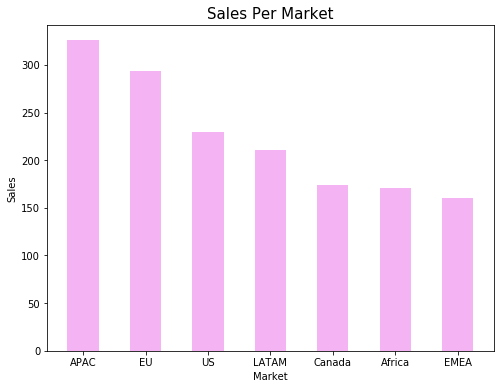

In [74]:
plt.figure(figsize=(8,6))
plt.bar(market_sales.sort_values(by='Sales',ascending = False)['Market'],
        market_sales.sort_values(by='Sales',ascending = False)['Sales'], 
        color = ['violet'],
        alpha = 0.6,
       width=0.5)

plt.title('Sales Per Market',fontdict={'fontsize':15})
plt.ylabel('Sales')
plt.xlabel('Market')
plt.show()

The sales in APAC market is high

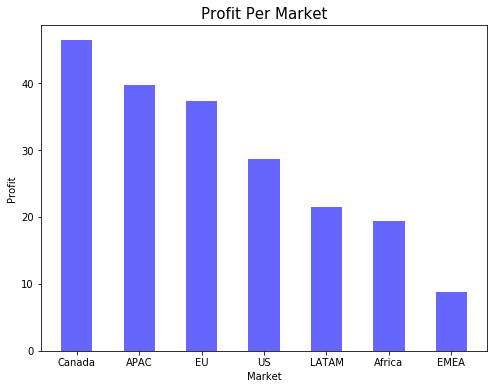

In [75]:
plt.figure(figsize=(8,6))
plt.bar(market_sales.sort_values(by='Profit',ascending = False)['Market'],
        market_sales.sort_values(by='Profit',ascending = False)['Profit'], 
        color = ['blue'],
        alpha = 0.6,
       width=0.5)

plt.title('Profit Per Market',fontdict={'fontsize':15})
plt.ylabel('Profit')
plt.xlabel('Market')
plt.show()

The Canadian market has the highest profit

#### 4.2 The month in which the company records more sales

In [76]:
#data['Order Month'] = data['Order Date'].dt.month_name()
data['Order Month'] = data['Order Date'].dt.strftime('%m')
monthly_sales = data.groupby('Order Month').mean()['Sales']
monthly_sales=monthly_sales.reset_index()
monthly_sales

,Order Month,Sales
0,01,248.483956
1,02,246.960427
2,03,255.185913
3,04,243.388774
4,05,247.947100
5,06,235.561690
6,07,234.876381
7,08,264.581295
8,09,237.567257
9,10,250.901605


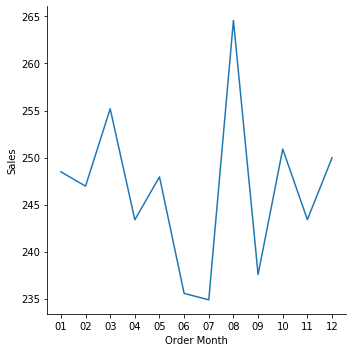

In [135]:
sns.relplot(x="Order Month",
            y="Sales",
            kind='line',
            ci=None,
            data=data
            )



# Show plot
plt.show()

The best sales month is the 8th Month (August) from the data and line plot

#### 4.3 What is the most and least profitable market?
Profitability is the ability of a market to yield profit or financial gain.

In [78]:
profitability = data.groupby('Market').mean()[['Profit', 'Sales']]
profitability = profitability.reset_index()
profitability


,Market,Profit,Sales
0,APAC,39.629163,325.917481
1,Africa,19.374674,170.868370
2,Canada,46.399453,174.292109
3,EMEA,8.728966,160.302508
4,EU,37.282974,293.808906
5,LATAM,21.531328,210.278334
6,US,28.656896,229.858001


The Canadian Market has the highest profit even though the sales are not so high. Also, inferring from bar plots of sales and profit, we see that the Canadian Market has a high profit

#### 4.4 Checking for correlation between numerical values

In [79]:
num_data = data.describe(include = np.number)
correlation = num_data.corr()

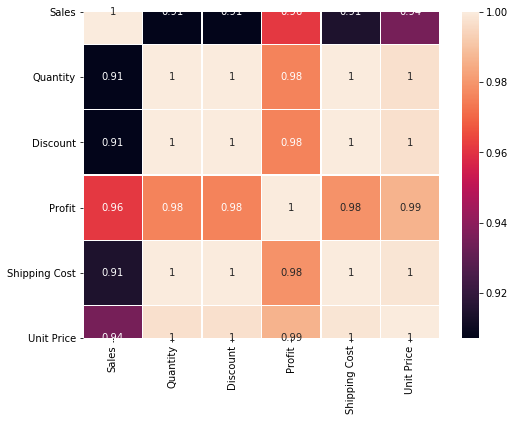

In [109]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot= True, linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

#### *The heatmap shows the following:*
1. Strong Positive correlation between Sales and Discount

2. Strong Positive Correlation between Profit and Discount

3. Strong Positive correlation between Sales and Profit

4. Strong Positive correlation between Profit and Quantity

5. There is a strong positive correlation between shipping cost and profit, that is 0.98

These correlations are an indication that there is a strong relationship beteween Sales and Profit, Discount and Profit and Shipping cost and profit and quantity and profit. These correlations do not mean that one variable has an impact on the other. We will have to do a regression plot to know if these variables truly affect one another.

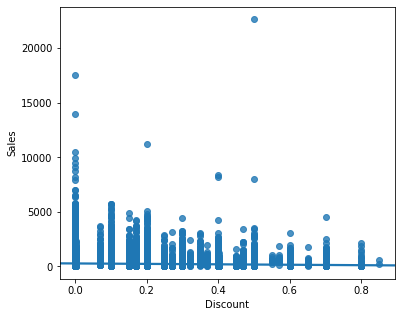

In [89]:
#Checking regression for Discount and sales
f, ax = plt.subplots(figsize=(6, 5))
sns.regplot(x="Discount", y="Sales", data=data, ax=ax);

The plot above shows the discount has no impact on sales

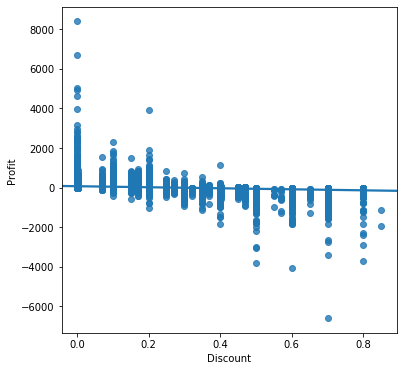

In [91]:
#Checking regression for Discount and profit
f, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x="Discount", y="Profit", data=data, ax=ax);

The plot is an indication that the discount has no effect on profit

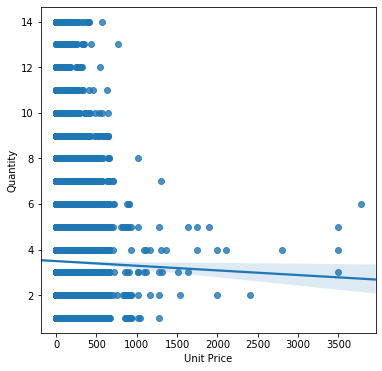

In [83]:
#Checking regression for Unit Price and Quantity
f, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x="Unit Price", y="Quantity", data=data, ax=ax);

The plot above shows that the unit price soes not impact the order quantity

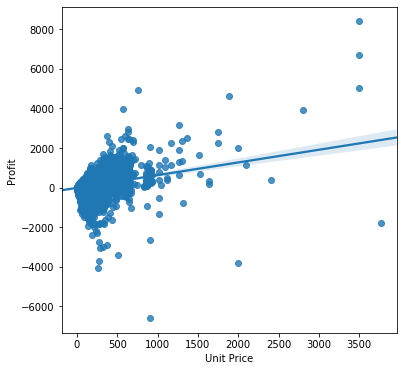

In [92]:
#Checking regression for Unit Price and Profit
f, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x="Unit Price", y="Profit", data=data, ax=ax);

The plot above is an indication that the unit price has an impact on the profit

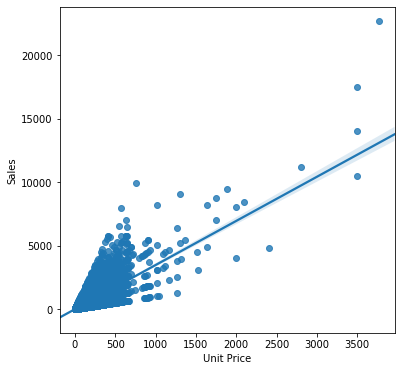

In [94]:
#Checking regression for Unit Price and Sales
f, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x="Unit Price", y="Sales", data=data, ax=ax);

The plot above shows that the unit price has an impact on the sales. We see that the sales is concenterated around the unit price from 0 dollars to about 1000 dollars

#### 4.5 Checking if shipping cost affects the sales

In [131]:
#Shipping Cost againt Sales
ship_sales= data[['Shipping Cost','Sales']]
ship_sales.head()

,Shipping Cost,Sales
0,35.46,408.300
1,9.72,120.366
2,8.17,66.120
3,4.82,44.865
4,4.70,113.670


Shipping cost does not affect sales

In [99]:
#Shipping Cost against Sales and profit by region
sales_vrs_shipping = data.groupby(["Region"])[["Shipping Cost", "Sales", "Profit"]].max()
sales_vrs_shipping =sales_vrs_shipping.reset_index()
sales_vrs_shipping

,Region,Shipping Cost,Sales,Profit
0,Africa,903.04,5301.2400,2597.2800
1,Canada,546.56,3863.8800,1159.0200
2,Caribbean,704.06,2818.0800,1073.4400
3,Central,910.16,17499.9500,8399.9760
4,Central Asia,835.57,5751.5400,2817.9900
5,EMEA,832.41,5211.1200,1622.8800
6,East,933.57,11199.9680,5039.9856
7,North,730.91,5785.0200,2461.3200
8,North Asia,804.54,6998.6400,2939.3100
9,Oceania,923.63,6439.8000,2447.1000


Shipping cost has no impact on sales and profit for each region

#### 4.6  The dominant product category in each market

In [110]:
dominant_cat = pd.pivot_table(data=data[['Market','Category','Quantity']], 
                        index=['Market','Category'], 
                        values='Quantity',
                        aggfunc='sum')

dominant_cat = dominant_cat.reset_index()
dominant_cat

,Market,Category,Quantity
0,APAC,Furniture,9099
1,APAC,Office Supplies,23134
2,APAC,Technology,8993
3,Africa,Furniture,1431
4,Africa,Office Supplies,7102
5,Africa,Technology,2031
6,Canada,Furniture,78
7,Canada,Office Supplies,613
8,Canada,Technology,142
9,EMEA,Furniture,1780


The dominant Category for each Market are as follows:

1. APAC ===== Office Supplies

2. Canada ===== Office Supplies

3. Africa ==== Office Supplies

4. EMEA ==== Office Supplies

5. EU ===== Office Supplies

6. LATNAM ===== Office Supplies

7. US ====== Office Supplies

Office supplies is clearly the dominant category in each Market, followed by technology, then furniture

 #### 4.7 Which City has most orders for a given product category?

In [111]:
# Grouping products by Category and Quantities
cat_city = pd.DataFrame(data.groupby(['City', 'Category']).sum()['Quantity'])

# Sorting the values
cat_city = cat_city.reset_index()
cat_city.sort_values(['Category','Quantity'], ascending=False).head(10)


,City,Category,Quantity
5106,New York City,Technology,632
4219,Los Angeles,Technology,603
4423,Manila,Technology,407
5568,Philadelphia,Technology,405
6492,Santo Domingo,Technology,335
6331,San Francisco,Technology,316
6552,Seattle,Technology,292
4406,Managua,Technology,252
3104,Houston,Technology,251
6919,Sydney,Technology,251


New York City has the most order quantity for the Technology Category

#### 4.8 Which products are making loss?



In [107]:
# Ten products that are making a loss
products_with_losses = data.groupby('Product Name').Profit.sum().nsmallest(10)
products_with_losses

Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Motorola Smart Phone, Cordless                             -4447.0380
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Bevis Round Table, Adjustable Height                       -3649.8940
Bevis Computer Table, Fully Assembled                      -3509.5638
Rogers Lockers, Blue                                       -2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bevis Wood Table, with Bottom Storage                      -2782.5880
Lesro Training Table, Rectangular                          -2581.2834
Name: Profit, dtype: float64

In [108]:
#Sub categories with losses or least profit
data.groupby('Sub-Category').Profit.sum().nsmallest(10)

Sub-Category
Tables        -64083.3887
Fasteners      11525.4241
Labels         15010.5120
Supplies       22583.2631
Envelopes      29601.1163
Furnishings    46967.4255
Art            57953.9109
Machines       58867.8730
Paper          59207.6827
Binders        72449.8460
Name: Profit, dtype: float64

In [104]:
data.groupby('Category').Profit.sum().nsmallest()

Category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: Profit, dtype: float64

The least profitable category is furniture, specifically the tables sub-category and a list of other items all are losses

#### 4.9 Which segment provides more profit?



In [34]:
profit_segment = data.groupby('Segment').Profit.sum().nlargest()
profit_segment

Segment
Consumer       749239.78206
Corporate      441208.32866
Home Office    277009.18056
Name: Profit, dtype: float64

The consumer segment has yields more profit, see pie chart below

In [35]:
sales_segment= data.groupby('Segment').Sales.sum().nlargest().round()
sales_segment

Segment
Consumer       6507949.0
Corporate      3824698.0
Home Office    2309855.0
Name: Sales, dtype: float64

The consumer segment has more sales, see pie chart below

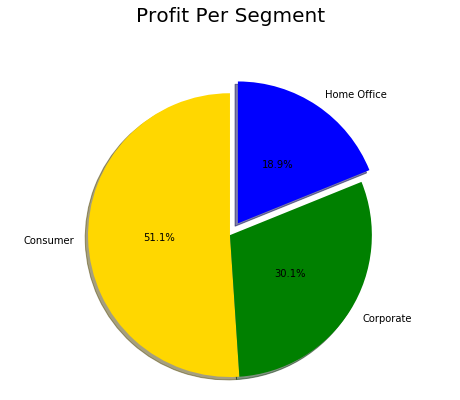

In [36]:
fig,ax = plt.subplots(figsize=(8,6))

colors_list=['gold','green','blue']

explode_list= [0,0,0.1]

ax.pie( profit_segment,
                        startangle = 90,
                        shadow=True,
                        labels= profit_segment.index,
                        pctdistance=0.5,
                        autopct = '%.1f%%',
                        colors=colors_list,
                        explode=explode_list,
                    ) 
ax.set_title('Profit Per Segment',y=1.12,fontsize=20)
plt.axis('equal')
#ax.legend(labels=profit_segment.index,loc='upper left')
plt.show()

The segment that provides more profit is the consumer segment followed by the corporate segment

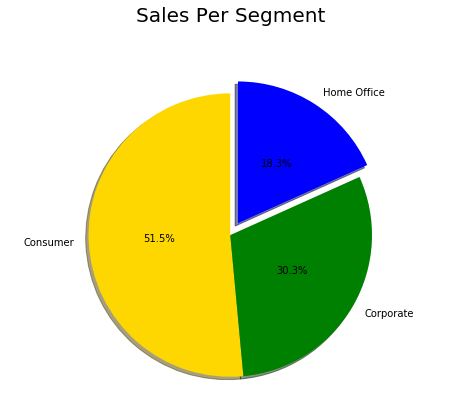

In [37]:
fig,ax = plt.subplots(figsize=(8,6))

colors_list=['gold','green','blue']

explode_list= [0,0,0.1]

ax.pie( sales_segment,
                        startangle = 90,
                        shadow=True,
                        labels= profit_segment.index,
                        pctdistance=0.5,
                        autopct = '%.1f%%',
                        colors=colors_list,
                        explode=explode_list,
                    ) 
ax.set_title('Sales Per Segment',y=1.12,fontsize=20)
plt.axis('equal')
#ax.legend(labels=sales_segment.index,loc='upper left')
plt.show()

The segment that provides more sales is the consumer segment followed by the cooperate segment

#### 4.10 Which order priority yields more sales?



In [114]:
#Which Order Priority has more Sales
order_priority_sales = data.groupby('Order Priority').Sales.sum().round()
order_priority_sales

Order Priority
Critical     986235.0
High        3807548.0
Low          567826.0
Medium      7280892.0
Name: Sales, dtype: float64

The Medium priority yield more sales

#### 4.11 What is the average shipping cost to each region?



In [122]:
#checking for average shipping cost by region
avg_shipping = data.groupby(["Region"])[["Shipping Cost"]].mean()
avg_shipping = avg_shipping.reset_index()
avg_shipping

,Region,Shipping Cost
0,Africa,19.215058
1,Canada,19.285495
2,Caribbean,21.059260
3,Central,26.710494
4,Central Asia,38.003003
5,EMEA,17.573221
6,East,25.542001
7,North,27.476299
8,North Asia,40.646112
9,Oceania,34.593780


North Asia has the highest average shipping cost and EMEA has the least average shipping cost

#### 4.12 What product categories should be targeted to the  different markets?



In [114]:
product_target = data.groupby(["Market"])[["Category","Profit"]].max()
product_target = product_target.reset_index()
product_target

,Market,Category,Profit
0,APAC,Technology,2939.310
1,Africa,Technology,2597.280
2,Canada,Technology,1159.020
3,EMEA,Technology,1622.880
4,EU,Technology,3979.080
5,LATAM,Technology,1313.280
6,US,Technology,8399.976


The Technology category should be targeted to all markets especially US, EU, APAC and Africa

In [16]:
product_target = data.groupby(["Market"])[["Sub-Category","Profit"]].max()
product_target = product_target.reset_index()
product_target

,Market,Sub-Category,Profit
0,APAC,Tables,2939.310
1,Africa,Tables,2597.280
2,Canada,Tables,1159.020
3,EMEA,Tables,1622.880
4,EU,Tables,3979.080
5,LATAM,Tables,1313.280
6,US,Tables,8399.976


Tables can be targeted to the US, EU and APAC markets as they seem to yield profits in these markets

In [20]:
#products with minimum profit
product_target = data.groupby(["Market"])[["Sub-Category","Profit"]].min()
product_target= product_target.reset_index()
product_target

,Market,Sub-Category,Profit
0,APAC,Accessories,-3009.435
1,Africa,Accessories,-1576.824
2,Canada,Accessories,0.000
3,EMEA,Accessories,-4088.376
4,EU,Accessories,-3059.820
5,LATAM,Accessories,-1806.240
6,US,Accessories,-6599.978


Accessories seem to yield no profit in all markets

#### 4.13 Does the interval between the order date and the shipping date affect sale and profit



In [30]:
#Does Order interval affect Profit?
or_int_profit = data.groupby('Order Interval').Profit.sum()
or_int_profit.head(10)

Order Interval
-322 days   -1032.75900
-321 days    -181.42300
-320 days    3566.44690
-319 days    1810.08620
-318 days    2122.14082
-317 days    2034.80120
-316 days     290.88600
-294 days       9.87000
-293 days     411.17500
-292 days    -252.67920
Name: Profit, dtype: float64

In [31]:
data.groupby('Order Interval').Profit.sum().nsmallest(10)

Order Interval
-259 days   -3878.95836
124 days    -2940.48100
-138 days   -2014.88950
-322 days   -1032.75900
-199 days    -603.67270
-79 days     -344.75600
-58 days     -262.08400
-292 days    -252.67920
-321 days    -181.42300
-227 days     -68.65360
Name: Profit, dtype: float64

Order date interval may or may not affect the Profit. It however, most likely will not affect profit

#### Other Checks

In [15]:
data['Product Name'].value_counts().head(10)

Staples                                  227
Cardinal Index Tab, Clear                 92
Eldon File Cart, Single Width             90
Rogers File Cart, Single Width            84
Ibico Index Tab, Clear                    83
Sanford Pencil Sharpener, Water Color     80
Smead File Cart, Single Width             77
Stanley Pencil Sharpener, Water Color     75
Acco Index Tab, Clear                     75
Avery Index Tab, Clear                    74
Name: Product Name, dtype: int64

This is an indication that there are more orders for staples follwed by Eldon File Cart, Single Width.

In [37]:
#Top 10 products by Sales
data.groupby('Product Name').Sales.sum().nlargest(10)

Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64

From the sales information Apple Smart Phone, Full Size is the top product followed by Cisco Smart Phone, Full Size 

In [27]:
#Top 10 products by Profit
data.groupby('Product Name').Profit.sum().nlargest(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: Profit, dtype: float64

The following products are the top 10 products. The Canon imageCLASS 2200 Advanced Copier has the highest profit followed by Cisco Smart Phone, Full Size

In [45]:
data.groupby('Product Name').Profit.sum().nsmallest(10)

Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Motorola Smart Phone, Cordless                             -4447.0380
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Bevis Round Table, Adjustable Height                       -3649.8940
Bevis Computer Table, Fully Assembled                      -3509.5638
Rogers Lockers, Blue                                       -2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bevis Wood Table, with Bottom Storage                      -2782.5880
Lesro Training Table, Rectangular                          -2581.2834
Name: Profit, dtype: float64

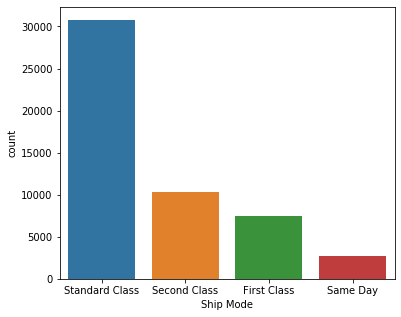

In [39]:
# Most preferred shipping Mode
# Setting the figure size
plt.figure(figsize=(6, 5))
sns.countplot(x='Ship Mode', data=data)
plt.show()

The most preferred shipping mode is the standard mode

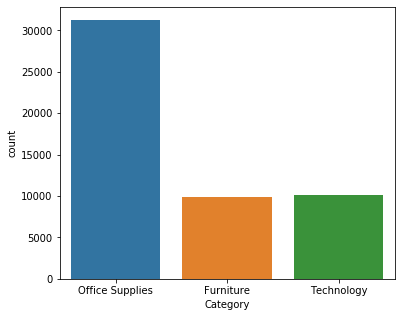

In [96]:
# Most preferred Category
# Setting the figure size
plt.figure(figsize=(6, 5))
sns.countplot(x='Category', data=data)
plt.show()

The most preferred category is office supplies

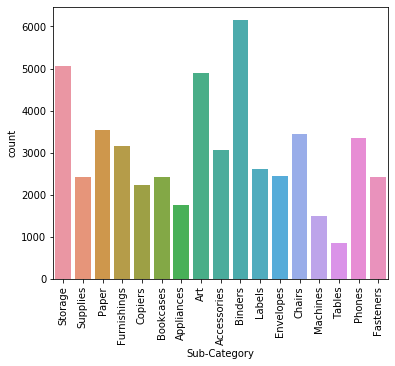

In [99]:
# Most preferred shipping Sub Category
# Setting the figure size
plt.figure(figsize=(6, 5))
sns.countplot(x='Sub-Category', data=data)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

The most preferred sub category is binders, followed by storage, then Art

In [106]:
# Grouping products by Category and Sub-Category
sub_cat = pd.DataFrame(data.groupby(['Category', 'Sub-Category']).sum()[['Profit', 'Sales']]).round()

# Sorting the values
sub_cat.sort_values(['Category','Profit', 'Sales'], ascending= True)
sub_cat = sub_cat.reset_index()
sub_cat

,Category,Sub-Category,Profit,Sales
0,Furniture,Bookcases,161924.0,1466572.0
1,Furniture,Chairs,140396.0,1501682.0
2,Furniture,Furnishings,46967.0,385578.0
3,Furniture,Tables,-64083.0,757042.0
4,Office Supplies,Appliances,141681.0,1011064.0
5,Office Supplies,Art,57954.0,372092.0
6,Office Supplies,Binders,72450.0,461912.0
7,Office Supplies,Envelopes,29601.0,170904.0
8,Office Supplies,Fasteners,11525.0,83242.0
9,Office Supplies,Labels,15011.0,73404.0


For furniture, book cases have the highest profit, appliances have the highest profit for office supplies and copiers have the highest profit for technology.

## Summary

Some suggestions are that the company can take into consideration to make OSIP a success:

From the analysis, the Canadian market,though low in sales, it is more profitable, followed by APAC has high sales and profit as well. This means sending more products to these markets will bring in more sales and profit.

The Technology category should be targetted at all markets, especially US, EU, APAC and Africa.

The dominant category in each market is office supplies, followed by technology. This means products in these categories will do well in the diifferent markets.

From the data analysis, some items were not doing so well, hence they can be sold via promotions. An example is "tables".

Since the discount has no impact on the sales, it will be great to have a referral system that  will reward customers who recommend the least purchased items in order to increase sales. Some of the least purchased items are;

Binders turned out to be the most preferred sub-category, followed by Storage and then Art, this means more sales can be made from these items.

Book cases have the highest profit for furniture category, appliances have the highest profit and sales for office supplies and copiers have the highest profit for technology items. Management can promote these items in order to make more profit.

The consumer segment also yields more profit, hence mangement can introduce a variety of consumer items into all the markets coupled with bonuses for referrals to increase sales and profit.

For items that are not bringing in much profit, advertisements can be employed to help increase sales and hence profit.





### Thank you